## Import the necesary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [3]:
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

## Load the dataset and basic analysis and checks

In [4]:
df = pd.read_csv("D:\PGD DS IIITB\Machine Learning I\Linear Regression Practice Datasets\insurance\insurance.csv")

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Analysis of the data. There are no missing values. Let us look for outliers

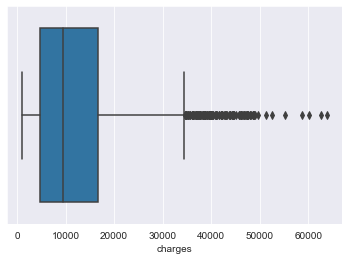

In [9]:
sns.boxplot(df["charges"]);

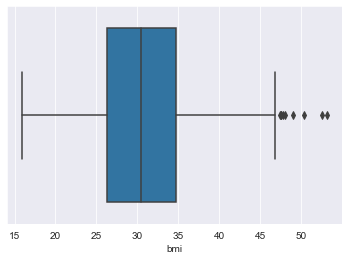

In [10]:
sns.boxplot(df["bmi"]);

**The data seems clean. The values seen in outliers analysis can be genuine values.**

## Univariate Analysis

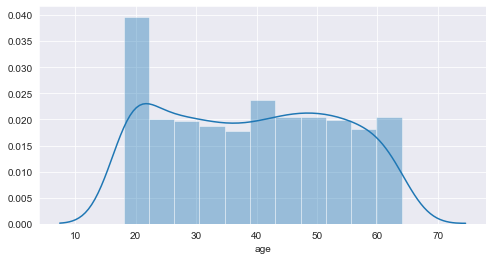

In [11]:
plt.figure(figsize=(8,4))
sns.distplot(df["age"]);

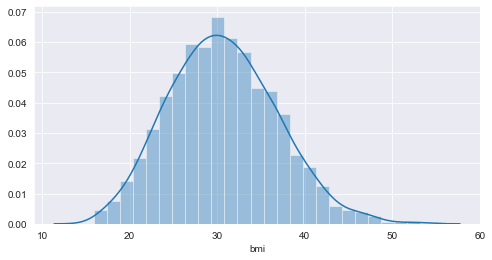

In [12]:
plt.figure(figsize=(8,4))
sns.distplot(df["bmi"]);

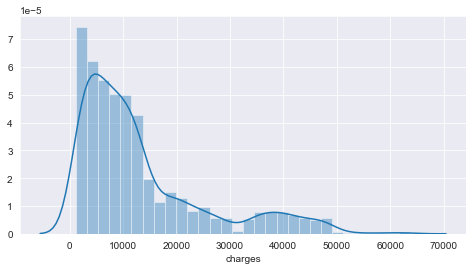

In [13]:
plt.figure(figsize=(8,4))
sns.distplot(df["charges"]);

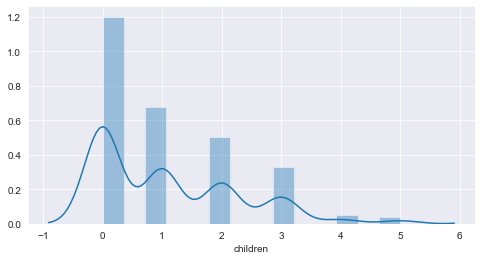

In [14]:
plt.figure(figsize=(8,4))
sns.distplot(df["children"]);

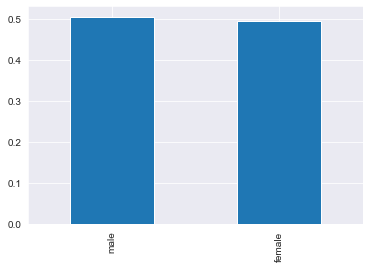

In [15]:
df["sex"].value_counts(normalize=True).plot.bar()
plt.show()

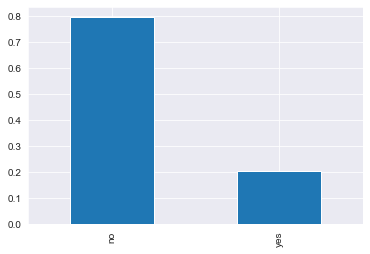

In [16]:
df["smoker"].value_counts(normalize=True).plot.bar()
plt.show()

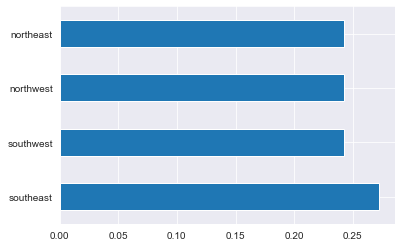

In [17]:
df["region"].value_counts(normalize=True).plot.barh()
plt.show()

## Bivariate Analysis

**Numerical-numerical variables**

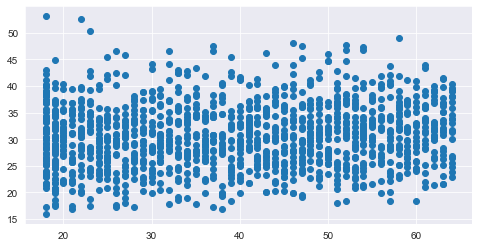

In [18]:
plt.figure(figsize=(8,4))
plt.scatter(df["age"], df["bmi"]);

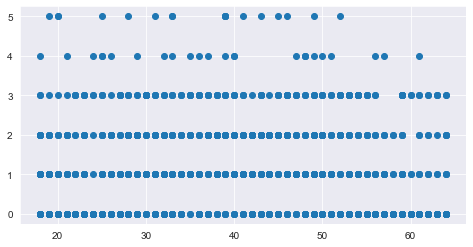

In [19]:
plt.figure(figsize=(8,4))
plt.scatter(df["age"], df["children"]);

**Numerical-categorical variables analysis**

**We form buckets for age and bmi columns**

**BMI_group : The grouping is based on WHO standards - https://www.euro.who.int/en/health-topics/disease-prevention/nutrition/a-healthy-lifestyle/body-mass-index-bmi.**

In [20]:
df["BMI_group"] = pd.cut(df["bmi"], bins=[0, 18.5, 25, 30, 9999], labels = ["Underweight", "Normal", "Overweight", "Obese"]) # The grouping is based on WHO standards - https://www.euro.who.int/en/health-topics/disease-prevention/nutrition/a-healthy-lifestyle/body-mass-index-bmi.

In [21]:
df["Age_group"] = pd.cut(df["age"], bins=[0, 30, 40, 50, 60, 9999], labels = ["<30", "30-40", "40-50", "50-60", "60+"])

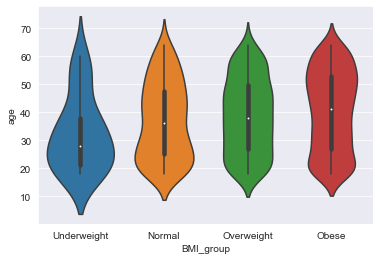

In [22]:
sns.violinplot(x = df["BMI_group"], y = df["age"]);

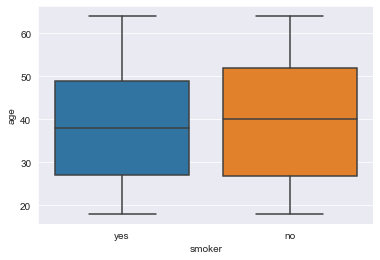

In [23]:
sns.boxplot(x = df["smoker"], y = df["age"]);

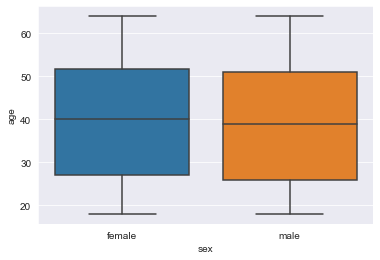

In [24]:
sns.boxplot(x = df["sex"], y = df["age"]);

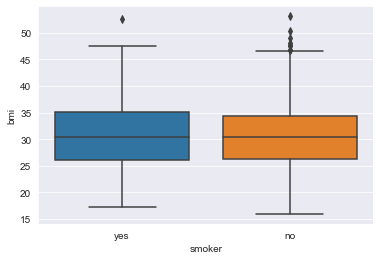

In [25]:
sns.boxplot(x = df["smoker"], y = df["bmi"]);

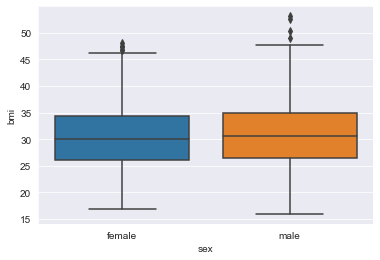

In [26]:
sns.boxplot(x = df["sex"], y = df["bmi"]);

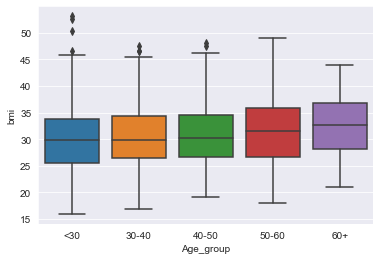

In [27]:
sns.boxplot(x = df["Age_group"], y = df["bmi"]);

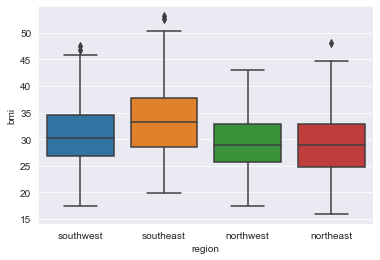

In [28]:
sns.boxplot(x = df["region"], y = df["bmi"]);

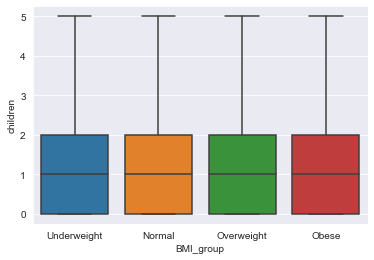

In [29]:
sns.boxplot(x = df["BMI_group"], y = df["children"]);

## Multivariate Analysis

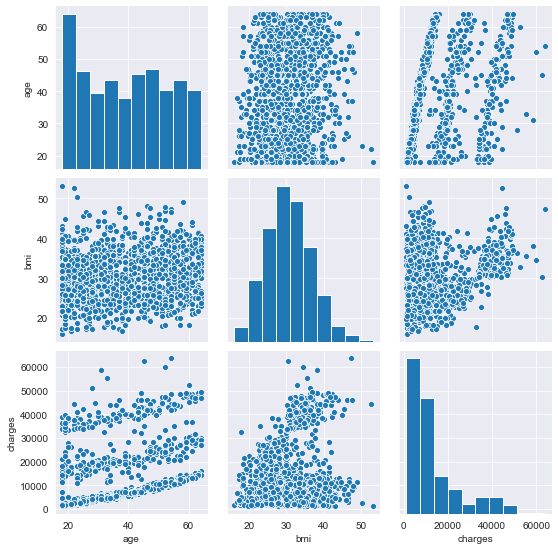

In [30]:
sns.pairplot(data = df, vars = ["age","bmi","charges"])
plt.show()

In [31]:
pd1 = pd.pivot_table(data = df, index = "sex", columns = "Age_group", values = "bmi")
pd1

Age_group,<30,30-40,40-50,50-60,60+
sex,,,,,
female,29.563341,29.806614,30.963536,31.101157,31.821809
male,30.195413,30.979423,30.653723,31.805573,33.104091


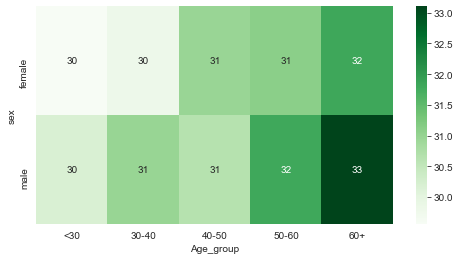

In [32]:
plt.figure(figsize= (8,4))
sns.heatmap(pd1, cmap = "Greens", annot = True)
plt.show()

In [33]:
pd2 = pd.pivot_table(data = df, index = "smoker", columns = "Age_group", values = "bmi")
pd2

Age_group,<30,30-40,40-50,50-60,60+
smoker,,,,,
no,29.737564,30.450640,30.899705,31.320561,32.915942
yes,30.453579,30.208981,30.477623,32.133333,30.954773


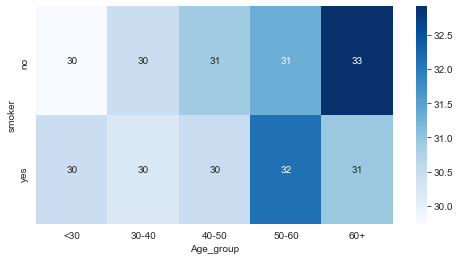

In [34]:
plt.figure(figsize= (8,4))
sns.heatmap(pd2, cmap = "Blues", annot = True)
plt.show()

In [35]:
pd3 = pd.pivot_table(data = df, index = "region", columns = "Age_group", values = "bmi")
pd3

Age_group,<30,30-40,40-50,50-60,60+
region,,,,,
northeast,27.952196,28.716048,29.813235,30.215758,31.399762
northwest,28.324954,29.096719,29.919242,29.795859,29.871304
southeast,33.520488,32.725797,33.169231,33.639275,34.086800
southwest,29.231132,30.840323,29.969565,31.996970,34.254545


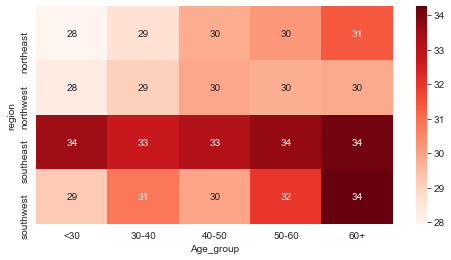

In [36]:
plt.figure(figsize= (8,4))
sns.heatmap(pd3, cmap = "Reds", annot = True)
plt.show()

In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges,BMI_group,Age_group
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,<30
1,18,male,33.770,1,no,southeast,1725.55230,Obese,<30
2,28,male,33.000,3,no,southeast,4449.46200,Obese,<30
3,33,male,22.705,0,no,northwest,21984.47061,Normal,30-40
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,30-40


In [38]:
pd4 = pd.pivot_table(data = df, index = "region", columns = "BMI_group", values = "bmi")
pd4

BMI_group,Underweight,Normal,Overweight,Obese
region,,,,
northeast,17.328000,22.490274,27.468571,34.581993
northwest,17.792143,22.721587,27.503832,33.723074
southeast,NaN,23.067805,27.853375,36.903416
southwest,18.000000,22.471429,27.737624,34.908187


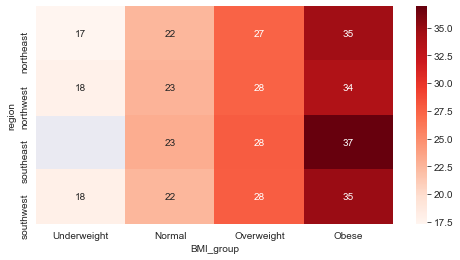

In [39]:
plt.figure(figsize= (8,4))
sns.heatmap(pd4, cmap = "Reds", annot = True)
plt.show()

### Important Inferences : <br>
**1. Smokers tend to have high bmi.**<br>
**2. 60+ males tend to have high bmi.**<br>
**3. Obese and overweight people have higher bmi.**<br>
**4. There are more number of people with high bmi values in southwest region.**<br>
**5. Generelly obesity and hence bmi increases with age.**<br>

## Linear Regression

**Let us see the correlation heatmap for out dataset**

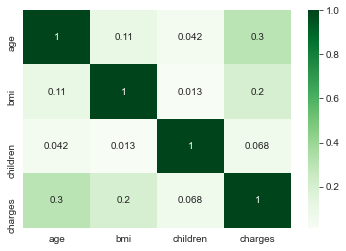

In [40]:
sns.heatmap(df.corr(), cmap = "Greens", annot=True);

**sex, BMI_group, Age_group, smoker and region are categorical variables. Let us encode them using LabelEncoder**

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le = LabelEncoder()

In [43]:
var = ["sex", "BMI_group", "Age_group", "smoker", "region"]

In [44]:
f = lambda x : le.fit_transform(x)

In [45]:
df[var] = df[var].apply(f)

In [46]:
df.head()

,age,sex,bmi,children,smoker,region,charges,BMI_group,Age_group
0,19,0,27.900,0,1,3,16884.92400,2,4
1,18,1,33.770,1,0,2,1725.55230,1,4
2,28,1,33.000,3,0,2,4449.46200,1,4
3,33,1,22.705,0,0,1,21984.47061,0,0
4,32,1,28.880,0,0,1,3866.85520,2,0


**Dividing the data into df_train and df_test**

In [47]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [48]:
df_train.shape

(936, 9)

In [49]:
df_test.shape

(402, 9)

**Let us scale the training data properly using MinMaxScaler**

In [50]:
scaler = MinMaxScaler()

In [51]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges,BMI_group,Age_group
966,51,1,24.795,2,1,1,23967.38305,0,2
522,51,0,33.915,0,0,0,9866.30485,1,2
155,44,1,39.520,0,0,1,6948.70080,1,1
671,29,0,31.160,0,0,0,3943.59540,1,4
1173,38,1,29.260,2,0,1,6457.84340,2,0


In [52]:
scale_var = ["age", "bmi", "children", "region", "BMI_group", "Age_group", "charges"]

In [53]:
df_train[scale_var] = scaler.fit_transform(df_train[scale_var])

In [54]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges,BMI_group,Age_group
966,0.717391,1,0.237692,0.4,1,0.333333,0.364661,0.000000,0.50
522,0.717391,0,0.483051,0.0,0,0.000000,0.139579,0.333333,0.50
155,0.565217,1,0.633844,0.0,0,0.333333,0.093008,0.333333,0.25
671,0.239130,0,0.408932,0.0,0,0.000000,0.045040,0.333333,1.00
1173,0.434783,1,0.357815,0.4,0,0.333333,0.085173,0.666667,0.00


**Building a Simple Linear Regression model**

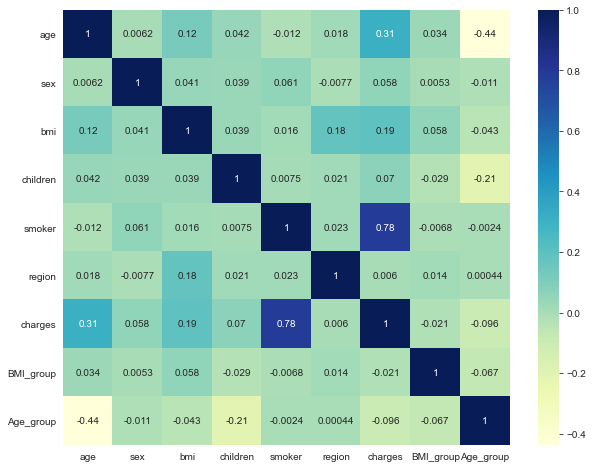

In [55]:
plt.figure(figsize= (10,8))
sns.heatmap(df_train.corr(), cmap = "YlGnBu", annot = True);

**Split df_train into X_train and y_train. We first start with variable smoker**

In [56]:
y_train = df_train.pop('charges')

In [57]:
X_train = df_train["smoker"]

**Let us try building a model using all the attributes**

In [58]:
X_train_sm = sm.add_constant(X_train)

In [59]:
lr = sm.OLS(y_train, X_train_sm).fit()

In [60]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     1465.
Date:                Wed, 24 Feb 2021   Prob (F-statistic):          1.60e-193
Time:                        16:59:08   Log-Likelihood:                 650.28
No. Observations:                 936   AIC:                            -1297.
Df Residuals:                     934   BIC:                            -1287.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1180      0.004     26.791      0.000       0.109       0.127
smoker         0.3822      0.010     38.275      0.000       0.363       0.402
==============================================================================
Omnibus:                      105.411   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.511
Skew:                           0.782   Prob(JB):                     3.12e-36
Kurtosis:                       4.322   Cond. No.                         2.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
y_train_pred = lr.predict(X_train_sm)

In [62]:
res = y_train - y_train_pred

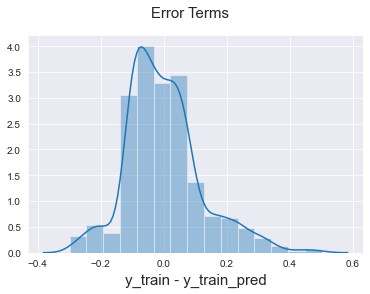

In [64]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

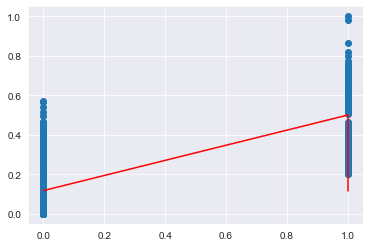

In [66]:
plt.scatter(X_train, y_train)
plt.plot(X_train_sm, y_train_pred, 'r')
plt.show()

---

**The model seems to have a good R-squared and adjusted R-squared value. Let's add one more variable age - Multiple Linear Regression**

In [61]:
X_train = df_train[["smoker", "age"]]

In [62]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     1161.
Date:                Tue, 23 Feb 2021   Prob (F-statistic):          7.62e-254
Time:                        18:48:42   Log-Likelihood:                 793.51
No. Observations:                 936   AIC:                            -1581.
Df Residuals:                     933   BIC:                            -1567.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0247      0.006      3.888      0.000       0.012       0.037
smoker         0.3842      0.009     44.803      0.000       0.367       0.401
age            0.2028      0.011     18.277      0.000       0.181       0.225
==============================================================================
Omnibus:                      189.370   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.124
Skew:                           1.096   Prob(JB):                     5.39e-95
Kurtosis:                       5.515   Cond. No.                         4.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R-squared and adjusted R-squared value have increased. Now let's add one more variable bmi**

In [63]:
X_train = df_train[["smoker", "age", "bmi"]]

In [64]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     856.0
Date:                Tue, 23 Feb 2021   Prob (F-statistic):          3.43e-267
Time:                        18:48:42   Log-Likelihood:                 828.06
No. Observations:                 936   AIC:                            -1648.
Df Residuals:                     932   BIC:                            -1629.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0366      0.009     -3.856      0.000      -0.055      -0.018
smoker         0.3830      0.008     46.311      0.000       0.367       0.399
age            0.1918      0.011     17.802      0.000       0.171       0.213
bmi            0.1668      0.020      8.449      0.000       0.128       0.205
==============================================================================
Omnibus:                      217.990   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              503.204
Skew:                           1.254   Prob(JB):                    5.38e-110
Kurtosis:                       5.572   Cond. No.                         7.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R-squared and adjusted R-squared value have increased. Let's check VIF for these 3 variables**

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,bmi,2.83
1,age,2.70
0,smoker,1.21


**From above statistics, we see that so far the model is doing good. Let's see if we can add any more variables**

**Let's see what happens if we add children variable**

In [67]:
X_train = df_train[["smoker", "age", "bmi", "children"]]

In [68]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     648.2
Date:                Tue, 23 Feb 2021   Prob (F-statistic):          2.76e-267
Time:                        18:48:42   Log-Likelihood:                 831.76
No. Observations:                 936   AIC:                            -1654.
Df Residuals:                     931   BIC:                            -1629.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0435      0.010     -4.438      0.000      -0.063      -0.024
smoker         0.3828      0.008     46.448      0.000       0.367       0.399
age            0.1907      0.011     17.747      0.000       0.170       0.212
bmi            0.1649      0.020      8.379      0.000       0.126       0.204
children       0.0368      0.014      2.719      0.007       0.010       0.063
==============================================================================
Omnibus:                      222.839   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              527.759
Skew:                           1.269   Prob(JB):                    2.50e-115
Kurtosis:                       5.663   Cond. No.                         7.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,bmi,3.19
1,age,2.77
3,children,1.72
0,smoker,1.21


**R-squared values have slightly increased and VIF values are also in range (below 5)**

**Let's see what happens if we add sex variable**

In [70]:
X_train = df_train[["smoker", "age", "bmi", "children", "sex"]]

In [71]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     518.0
Date:                Tue, 23 Feb 2021   Prob (F-statistic):          7.46e-266
Time:                        18:48:43   Log-Likelihood:                 831.76
No. Observations:                 936   AIC:                            -1652.
Df Residuals:                     930   BIC:                            -1622.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0436      0.010     -4.283      0.000      -0.064      -0.024
smoker         0.3828      0.008     46.335      0.000       0.367       0.399
age            0.1907      0.011     17.738      0.000       0.170       0.212
bmi            0.1649      0.020      8.367      0.000       0.126       0.204
children       0.0368      0.014      2.714      0.007       0.010       0.063
sex            0.0003      0.007      0.044      0.965      -0.013       0.013
==============================================================================
Omnibus:                      222.862   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              527.835
Skew:                           1.269   Prob(JB):                    2.41e-115
Kurtosis:                       5.663   Cond. No.                         8.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**We can see that adding sex variable is not good for the model. The adjusted R-squared has decreased and children and sex become insignificant**

**All other variables are not that correlated to our target variable charges. So we infer that out final model should contain only smoker, bmi, age and children variables.**

In [72]:
X_train = df_train[["smoker", "age", "bmi", "children"]]

In [73]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     648.2
Date:                Tue, 23 Feb 2021   Prob (F-statistic):          2.76e-267
Time:                        18:48:44   Log-Likelihood:                 831.76
No. Observations:                 936   AIC:                            -1654.
Df Residuals:                     931   BIC:                            -1629.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0435      0.010     -4.438      0.000      -0.063      -0.024
smoker         0.3828      0.008     46.448      0.000       0.367       0.399
age            0.1907      0.011     17.747      0.000       0.170       0.212
bmi            0.1649      0.020      8.379      0.000       0.126       0.204
children       0.0368      0.014      2.719      0.007       0.010       0.063
==============================================================================
Omnibus:                      222.839   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              527.759
Skew:                           1.269   Prob(JB):                    2.50e-115
Kurtosis:                       5.663   Cond. No.                         7.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,bmi,3.19
1,age,2.77
3,children,1.72
0,smoker,1.21


**Now our model has all the significant variables (low p-values) that do not have multicollinearity. Also r-squared value is 73.6% and adjusted R-squared value is 73.5% which means that the model explains about 73.6% of variance between the dependent and independent variables. The F-statistice values show good results which expains that the overall model fit is good.**

**Our model parameters are :**

In [75]:
lr.params

const      -0.043460
smoker      0.382820
age         0.190729
bmi         0.164917
children    0.036829
dtype: float64

**Predict the results**

In [76]:
y_train_pred = lr.predict(X_train_sm)

In [77]:
res = y_train - y_train_pred

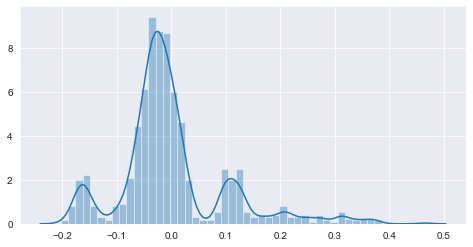

In [78]:
plt.figure(figsize= (8,4))
sns.distplot(res);

**Apply the model to test set**

In [79]:
scale_var = ["age", "bmi", "children", "region", "BMI_group", "Age_group", "charges"]

In [80]:
df_test[scale_var] = scaler.transform(df_test[scale_var])

In [81]:
y_test = df_test.pop('charges')


In [82]:
X_test = df_test[["age", "smoker", "bmi", "children"]]

In [83]:
X_test_sm = sm.add_constant(X_test)

In [84]:
X_test_sm.head()

,const,age,smoker,bmi,children
12,1.0,0.108696,0,0.496099,0.0
306,1.0,0.217391,0,0.310465,0.4
318,1.0,0.565217,0,0.314366,0.0
815,1.0,0.043478,0,0.417003,0.0
157,1.0,0.000000,1,0.247915,0.0


In [85]:
y_test_pred = lr.predict(X_test_sm)

**Model evaluation**

Text(0, 0.5, 'y_pred')

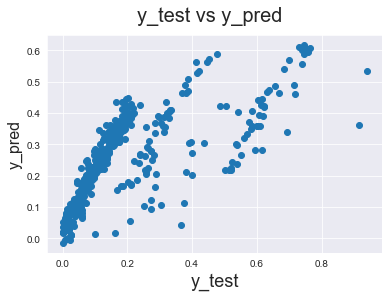

In [86]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

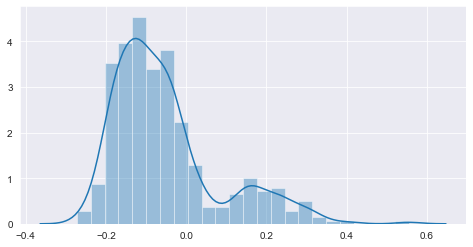

In [87]:
res = y_test - y_test_pred
plt.figure(figsize= (8,4))
sns.distplot(res);

## This ends our analysis. Thank You.